In [1]:
## Init ##
from bmdcluster import generalBMD
import numpy as np
import pandas as pd
from scipy.linalg import block_diag
from sklearn.cluster import KMeans
import sys

sys.path.insert(1, '/scion/')
import scion

fname = r'..\data\SupportingData_v8.xlsx'

In [2]:
## Chemical Space Clustering ##

# Load Data
cols = ['Mass', 'N/C', 'N/H', 'O/C', 'O/H', 'logP', 'pKa (most acidic)',
        'Balaban Index', 'Harary Index', 'Ring Bond %']
csdata = pd.read_excel(fname, sheet_name='ChemSpace', usecols=cols)
csdata_norm = scion.normalize(csdata)
csdata_pca = scion.get_pca(csdata_norm)

For n_clusters = 4 The average silhouette_score is : 0.5903601852015861


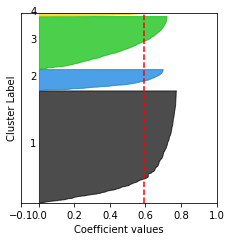

For n_clusters = 5 The average silhouette_score is : 0.5429992340391322


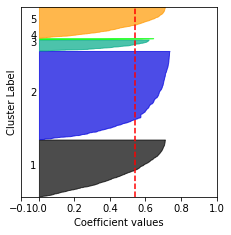

For n_clusters = 6 The average silhouette_score is : 0.5323081760295005


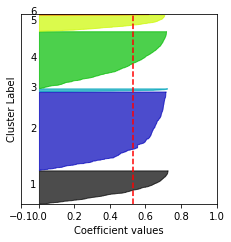

For n_clusters = 7 The average silhouette_score is : 0.5122364158497612


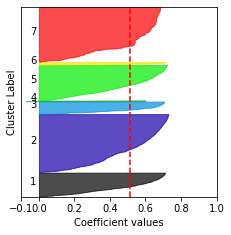

For n_clusters = 8 The average silhouette_score is : 0.5114519922206706


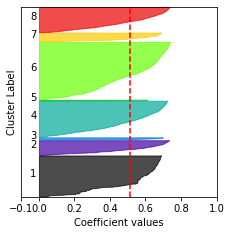

For n_clusters = 9 The average silhouette_score is : 0.5109625095444361


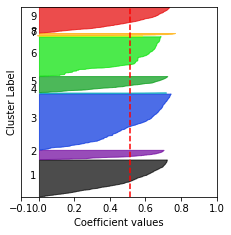

For n_clusters = 10 The average silhouette_score is : 0.514143152684642


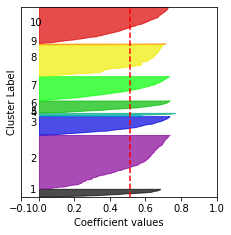

For n_clusters = 11 The average silhouette_score is : 0.4946512082561926


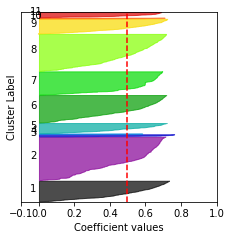

For n_clusters = 12 The average silhouette_score is : 0.498556670948734


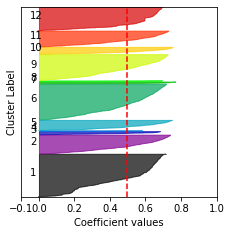

In [3]:
# Silhouette analysis
min_clust = 4
max_clust = 12
for i in range(min_clust, max_clust + 1):
    filename = '../images/silhouette/cs_%i' % i
    scion.silhouette_analysis(csdata_pca, i, filename=filename)

In [4]:
# Perform K-means clustering and generate labels
n_clusters = 8  # Chosen based on results from above section
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
klabels = clusterer.fit_predict(csdata_pca)

for i in range(csdata_pca.shape[1]):
    csdata['PC%i' % (i + 1)] = csdata_pca[:, i]
csdata['ChemSpace Cluster'] = klabels + 1
csdata.head()

,Mass,N/C,N/H,O/C,O/H,Ring Bond %,logP,pKa (most acidic),Balaban Index,Harary Index,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,ChemSpace Cluster
0,53.0265,0.333333,0.333333,0.000000,0.00,0.0,0.76,NaN,1.97,4.33,...,-11.447632,-10.917162,17.429968,6.611669,5.782379,-3.575303,-17.647962,-11.294373,1.428901,1
1,56.0262,0.000000,0.000000,0.333333,0.25,0.0,-0.29,13.65,1.97,4.33,...,-2.507714,-5.537017,11.703287,5.644499,12.306515,-5.111999,-30.734348,-14.446752,3.310768,1
2,56.0262,0.000000,0.000000,0.333333,0.25,0.0,0.37,1.97,1.97,4.33,...,-6.822985,-10.267893,19.898428,5.670140,5.771819,-3.651758,-17.814586,-11.884041,1.766119,1
3,57.0704,0.000000,0.000000,0.000000,0.00,0.0,2.11,NaN,1.97,4.33,...,-9.089166,-8.422304,19.312995,6.418366,4.811376,-3.677601,-18.085165,-11.473656,1.771756,1
4,58.0055,0.000000,0.000000,1.000000,1.00,0.0,0.00,4.33,1.97,4.33,...,-0.921671,-14.058017,20.433423,2.925425,9.409706,-3.805412,-19.172665,-12.126073,3.207023,1


For n_clusters = 4 The average silhouette_score is : 0.20827382638829814


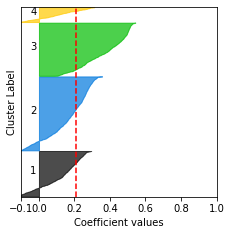

For n_clusters = 5 The average silhouette_score is : 0.1519801726442335


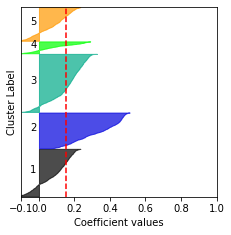

For n_clusters = 6 The average silhouette_score is : 0.15574727670681293


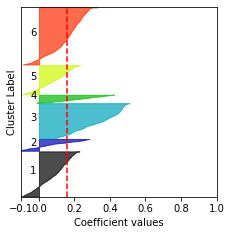

For n_clusters = 7 The average silhouette_score is : 0.15246290842485982


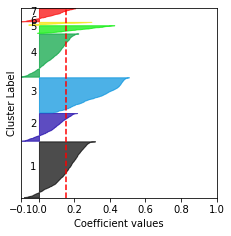

For n_clusters = 8 The average silhouette_score is : 0.11597460581583215


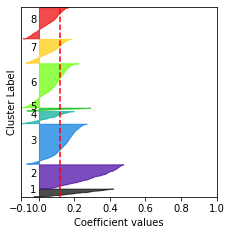

For n_clusters = 9 The average silhouette_score is : 0.10906847980300605


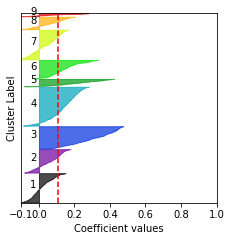

For n_clusters = 10 The average silhouette_score is : 0.09558751463810693


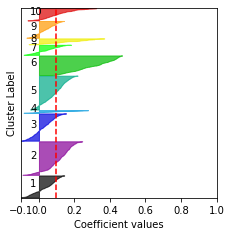

For n_clusters = 11 The average silhouette_score is : 0.08967123444983569


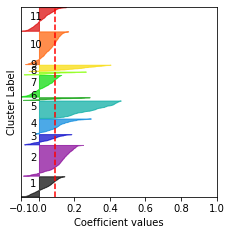

For n_clusters = 12 The average silhouette_score is : 0.08893103265615879


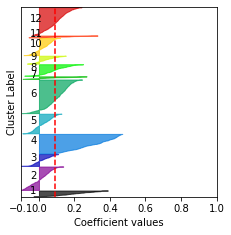

In [5]:
## DarkChem Clustering ##

# Note: latent space vectors previously generated using DarkChem

# Load data
cols = ['LS%i' % (i + 1) for i in range(128)]
dcdata = pd.read_excel(fname, sheet_name='DarkChem', usecols=cols)

# Silhouette analysis
min_clust = 4
max_clust = 12
for i in range(min_clust, max_clust + 1):
    filename = '../images/silhouette/dc_%i' % i
    scion.silhouette_analysis(dcdata, i, filename=filename)


In [6]:
# Perform K-means clustering and generate labels
n_clusters = 8  # Chosen based on results from above section
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
klabels = clusterer.fit_predict(dcdata)
dcdata['DarkChem Cluster'] = klabels + 1
dcdata.head()

,LS1,LS2,LS3,LS4,LS5,LS6,LS7,LS8,LS9,LS10,...,LS120,LS121,LS122,LS123,LS124,LS125,LS126,LS127,LS128,DarkChem Cluster
0,-0.028605,0.002911,0.722524,-0.673226,0.742175,-0.685647,-1.54930,-1.36342,0.130125,0.151330,...,-0.782898,0.830565,0.735776,0.753328,0.623353,1.68408,0.560167,-0.044441,-0.041235,2
1,-0.191936,0.010848,0.770422,-0.703127,0.779772,-0.748767,-1.60905,-1.40251,0.250601,0.241999,...,-1.202470,1.206090,0.617239,0.952408,0.698353,1.66330,0.696001,-0.119580,-0.126960,2
2,-0.135135,0.017564,0.753397,-0.727295,0.739853,-0.713431,-1.66737,-1.40840,0.292740,0.197320,...,-1.289620,1.001860,0.451903,0.989952,0.680800,1.62808,0.706923,-0.103880,-0.131220,2
3,-0.078763,0.007019,0.710423,-0.680389,0.702765,-0.662945,-1.58135,-1.31550,0.162790,0.127463,...,-1.098610,0.802961,0.589649,0.782980,0.616438,1.68419,0.637622,-0.064494,-0.074283,2
4,-0.165507,0.005871,0.768664,-0.697129,0.746959,-0.709079,-1.60400,-1.37586,0.226744,0.162321,...,-1.117970,0.723069,0.595918,0.872244,0.647898,1.70363,0.634295,-0.085247,-0.136397,2


In [7]:
## Substructure-based Clustering ##

# Load data
ssdata = pd.read_excel(fname, sheet_name='Substructures', header=0)

# Perform clustering and generate labels
# Note: not done with KMeans since this is binary data
n_clusters = 8  # Chosen based on results from chemical space and DarkChem
cols = [x for x in list(ssdata) if 'SS' in x]
model = generalBMD(n_clusters=n_clusters, use_bootstrap=True, b=5)
model.fit(block_diag(ssdata[cols].values), verbose=True)
data_labels = model.get_data_labels()
ssdata['Substructure Cluster'] = data_labels + 1
ssdata.head()

Iteration: 0 ............. Cost: 272.655
Iteration: 1 ............. Cost: 261.150
Iteration: 2 ............. Cost: 257.379
Iteration: 3 ............. Cost: 254.337
Iteration: 4 ............. Cost: 252.121
Iteration: 5 ............. Cost: 250.908
Iteration: 6 ............. Cost: 250.268
Iteration: 7 ............. Cost: 249.770
Iteration: 8 ............. Cost: 249.489
Iteration: 9 ............. Cost: 249.224
Iteration: 10 ............. Cost: 248.923
Iteration: 11 ............. Cost: 248.593
Iteration: 12 ............. Cost: 248.487
Iteration: 13 ............. Cost: 248.462
Iteration: 14 ............. Cost: 248.442
Iteration: 15 ............. Cost: 248.392
Iteration: 16 ............. Cost: 248.355
Iteration: 17 ............. Cost: 248.192
Iteration: 18 ............. Cost: 248.091
Iteration: 19 ............. Cost: 248.056
Iteration: 20 ............. Cost: 248.055
Iteration: 21 ............. Cost: 248.054
Iteration: 22 ............. Cost: 248.053
Iteration: 23 ............. Cost: 248.053
It

,CpdInd,SS3,SS8,SS11,SS13,SS14,SS15,SS16,SS17,SS18,...,SS157,SS158,SS159,SS160,SS161,SS162,SS163,SS164,SS165,Substructure Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,5
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
4,4,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,5
